<a href="https://colab.research.google.com/github/uddhavN/K-means-Image-compression/blob/main/image_compression_with_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt



In [3]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]


    idx = np.zeros(X.shape[0], dtype=int)


    for i in range(X.shape[0]):

          distance = []
          for j in range(centroids.shape[0]):
              norm_ij = np.linalg.norm(X[i] - centroids[j])
              distance.append(norm_ij)

          idx[i] = np.argmin(distance)



    return idx

In [5]:
def compute_centroids(X, idx, K):


    m, n = X.shape


    centroids = np.zeros((K, n))


    for k in range(K):
          points = X[idx == k]
          centroids[k] = np.mean(points, axis = 0)



    return centroids


In [6]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):

    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)


    for i in range(max_iters):


        print("K-Means iteration %d/%d" % (i, max_iters-1))


        idx = find_closest_centroids(X, centroids)


        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

In [7]:
def kMeans_init_centroids(X, K):

    randidx = np.random.permutation(X.shape[0])

    centroids = X[randidx[:K]]

    return centroids

In [8]:
original_img = plt.imread('bird_small.png')


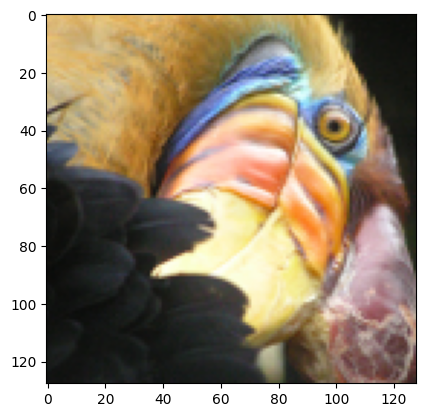

In [9]:
plt.imshow(original_img)

In [10]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


In [11]:
original_img = original_img / 255
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [12]:
K = 16
max_iters = 10
initial_centroids = kMeans_init_centroids(X_img, K)
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [13]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [12 12 12 12 12]


In [14]:
X_recovered = centroids[idx, :]
X_recovered = np.reshape(X_recovered, original_img.shape)

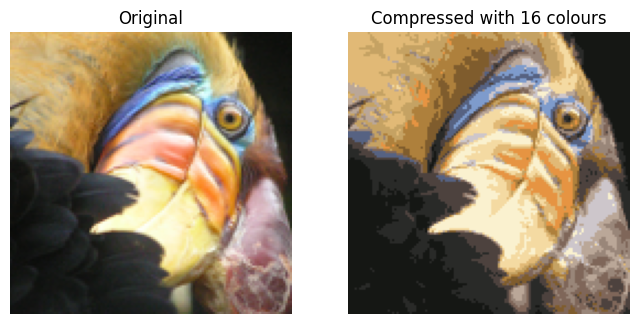

In [15]:

fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()